In [379]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import string as s

In [380]:
# Read in Poldem CSV file 
df = pd.read_csv(r"../../sql/poldem-election_uk.csv", encoding ="latin-1")

df = df[['year_election','title_art','sentence']]

In [381]:
#select only chosen year
year_selected = input("Please select a year to analyse:")

year_df = df.loc[df['year_election'] == int(year_selected)]

In [382]:
#put title_art and sentence values into lists
title_art_list = year_df['title_art'].values.tolist()

sentence_list = year_df['sentence'].values.tolist()

#remove duplicates
title_art_list_cleaned = list(set(title_art_list))

sentence_list_cleaned = list(set(sentence_list))

In [383]:
#set blocked words that could influence wordcloud, i.e. party and politician names, general politics terms

stopwords = ["David", "Cameron", "Ed", "Miliband", "Conservative", "Tories", "Labour", "Greens", "Green", "Ed Miliband", "David Cameron", "Will", "Tory", "Conservatives", "Plan", "Party", "Mr", "Government", "Pm", "Ukip", "Said", "Pledge", "Promise", "Rule", "People", "Make People", "Make", "Clegg", "Nick", "SNP", "Vote", "Farage", "Want", "New", "Plans", "Britain", "Balls", "Labours", "Leader", "Right", "Coalition", "Year", "Mp", "Power", "Say", "Lib Dem", "Lib", "Left", "Dem", "Back", "One", "Need", "Increase", "Milibands", "Pms", "C9", "Says", "Warned", "Risk", "Election", "Vow", "Im", "Cam", "May", "Take", "Call", "Prime Minister", "Corbyn", "Jeremy Corbyn", "May", "Theresa May", "Mr", "Mrs", "Yesterday", "Jeremy", "Theresa", "Minister","Â", "ÂÂ", "Ã", "ÃÃ", "Prime", "Manifesto", "Attack", "Time", "Last Night", "Us", "Per Cent", "Percent", "Accused", "LastNight", "Last", "Night", "Country", "Uk", "Per", "Cent", "Called", "Mays", "Told", "Liberal Democrat", "Brown", "Darling", "Gordon Brown", "Osborne", "Mps", "Gordon", "Liberal Democrat", "Michael Gove", "Made", "Wants", "Set", "Liberal", "Democrat", "Go", "Lord", "Day", "Howard", "Blair", "Tony Blair", "Tony", "Hague", "William Hague", "William", "John Major", "Major", "Thatcher", "Margaret", "Maggie", "Margaret Thatcher", "John", "Wonb4t Give", "Wonb4t", "Give", "Kinnock", "Ashdown"] + list(STOPWORDS)

In [384]:
#prepare string to concat
text = ""

#remove punctuation from each string, split into individual words and concatenate into one string
for string in sentence_list_cleaned:
    new_string = str(string).translate(str.maketrans('','',s.punctuation))
    words = new_string.split()
    for word in words:
        word = word.title()
        text = text + " " + word

for string in title_art_list_cleaned:
    new_string = str(string).translate(str.maketrans('','',s.punctuation))
    words = new_string.split()
    for word in words:
        word = word.title()
        text = text + " " + word

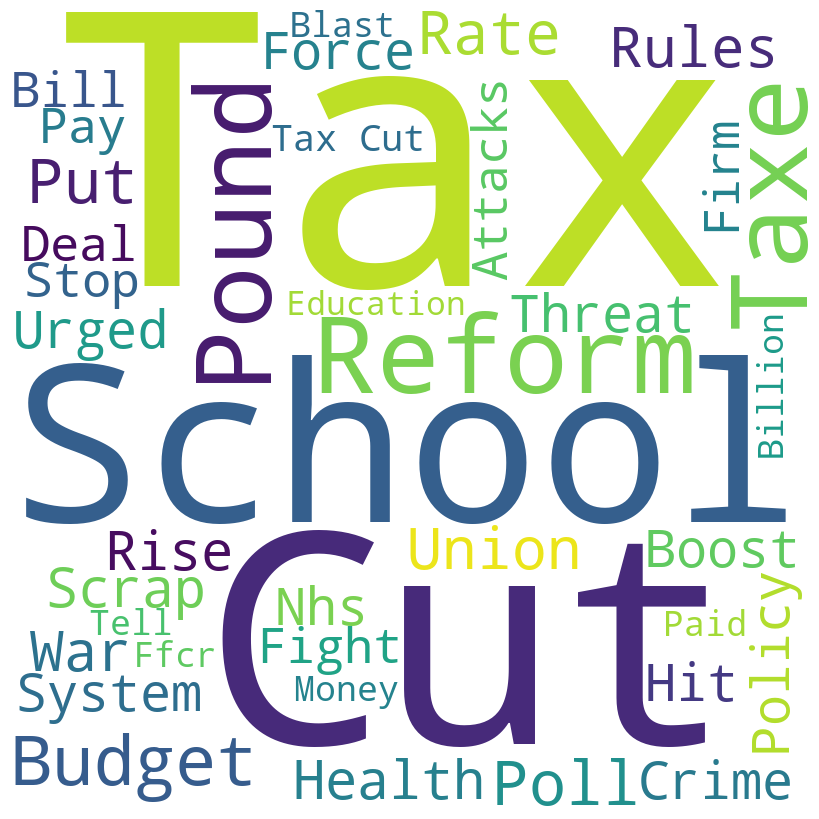

In [385]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words=40).generate(text)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.margins(x=0, y=10)

# save plot to image file
plt.savefig((year_selected)+"_poldem_wordcloud.png")
plt.show()